In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
dpath = os.path.join('.', 'data')
dat_file = os.path.join(dpath, 'fdata.csv')
plt.style.use('seaborn-whitegrid')

# Расчет нормальных поперечных сечений стержневых железобетонных элементов на основе нелинейной деформационной модели

## Параметры расчета

In [2]:
lim_st = '1_st'
iF = 3
dur = 'short'
gb_3 = 1.0

In [3]:
print("Предельное состояние : ", lim_st)
print("Нагружение L/C       : ", iF)
print("Длительность нагрузки: ", dur)
print("Коэффициент gb3      : ", gb_3)

Предельное состояние :  1_st
Нагружение L/C       :  3
Длительность нагрузки:  short
Коэффициент gb3      :  1.0


In [4]:
def prp():
    mat = pd.read_csv('materials.csv', sep=';')
    dat = pd.read_csv(dat_file, sep=';')
    if lim_st == '1_st':
        gb = 1.0
        gbt = 1.0
        gs = 1.0
        gb3 = gb_3
        if dur == 'long':
            gb1 = 0.9
        else:
            gb1 = 1.0
    else:
        gb1 = 1.0
        gb = 1.3
        gbt = 1.5
        gs = 1.15
        gb3 = 1.0
    grade = dat['Grade'].values
    pr = pd.merge(dat,  mat)
    concr = pr[pr['T'] == 'concrete']
    steel = pr[pr['T'] == 'rebar']
    grade_b = concr['Grade'].values
    grade_s = steel['Grade'].values
    e_2 = pr['eps2'].values
    e_0 = pr['eps0'].values
    e_1 = pr['eps1'].values
    e1 = pr['epst1'].values
    e0 = pr['epst0'].values
    e2 = pr['epst2'].values
    Rc = pd.concat([concr['Rc']*gb*gb1*gb3, steel['Rc']]).values
    S_1 = pr['Sc1'].values
    S1 = pr['St1'].values
    Rt = pd.concat([concr['Rt']*gbt*gb1,  steel['Rt'] * gs]).values
    E = pr['E'].values
    ce_2 = e_2[pr['T'] == 'concrete']
    ce_0 = e_0[pr['T'] == 'concrete']
    ce_1 = e_1[pr['T'] == 'concrete']
    ce1 = e1[pr['T'] == 'concrete']
    ce0 = e0[pr['T'] == 'concrete']
    ce2 = e2[pr['T'] == 'concrete']
    cS_1 = S_1[pr['T'] == 'concrete']
    cS1 = S1[pr['T'] == 'concrete']
    cRc = Rc[pr['T'] == 'concrete']
    cRt = Rt[pr['T'] == 'concrete']
    cE = E[pr['T'] == 'concrete']
    re_2 = e_2[pr['T'] == 'rebar']
    re_0 = e_0[pr['T'] == 'rebar']
    re_1 = e_1[pr['T'] == 'rebar']
    re1 = e1[pr['T'] == 'rebar']
    re0 = e0[pr['T'] == 'rebar']
    re2 = e2[pr['T'] == 'rebar']
    rS_1 = S_1[pr['T'] == 'rebar']
    rS1 = S1[pr['T'] == 'rebar']
    rRc = Rc[pr['T'] == 'rebar']
    rRt = Rt[pr['T'] == 'rebar']
    rE = E[pr['T'] == 'rebar']
    return ce_2,ce_0,ce_1,ce1,ce0,ce2,cS_1,cS1,cRc,cRt,cE,re_2,re_0,re_1,re1,re0,re2,rS_1,rS1,rRc,rRt,rE,\
    dat,mat,pr,grade_b,grade_s,e_2,e_0,e_1,e1,e0,e2,S_1,S1,Rc,Rt,E,concr,steel,gs

In [5]:
def chgprop(steel, concr, gs):
    R0 = np.zeros(len(concr))
    S1_s = steel['St1'].values
    Rt_s = steel['Rt'].values * gs
    S1 = np.append(R0, S1_s)
    Rt = np.append(R0, Rt_s)
    cS1 = R0
    cRt = R0
    return S1, Rt, cS1, cRt

In [6]:
ce_2,ce_0,ce_1,ce1,ce0,ce2,cS_1,cS1,cRc,cRt,cE,re_2,re_0,re_1,re1,re0,re2,rS_1,rS1,rRc,rRt,rE,\
dat,mat,pr,grade_b,grade_s,e_2,e_0,e_1,e1,e0,e2,S_1,S1,Rc,Rt,E,concr,steel,gs = prp()
if lim_st == '1_st':
    S1, Rt, cS1, cRt = chgprop(steel, concr, gs)

### База материалов

In [7]:
mat.head(np.size(mat))

,Grade,eps2,eps0,eps1,epst1,epst0,epst2,Rc,Sc1,St1,Rt,E,T
0,B15,-0.0035,-0.002000,-0.000212,0.000019,0.000100,0.00015,-8.5,-5.1,0.45,0.75,24000,concrete
1,B20,-0.0035,-0.002000,-0.000251,0.000020,0.000100,0.00015,-11.5,-6.9,0.54,0.90,27500,concrete
2,B25,-0.0035,-0.002000,-0.000290,0.000021,0.000100,0.00015,-14.5,-8.7,0.63,1.05,30000,concrete
3,B30,-0.0035,-0.002000,-0.000314,0.000021,0.000100,0.00015,-17.0,-10.2,0.69,1.15,32500,concrete
4,B35,-0.0035,-0.002000,-0.000339,0.000023,0.000100,0.00015,-19.5,-11.7,0.78,1.30,34500,concrete
5,B40,-0.0035,-0.002000,-0.000367,0.000023,0.000100,0.00015,-22.0,-13.2,0.84,1.40,36000,concrete
6,B45,-0.0035,-0.002000,-0.000405,0.000024,0.000100,0.00015,-25.0,-15.0,0.90,1.50,37000,concrete
7,B50,-0.0035,-0.002000,-0.000434,0.000025,0.000100,0.00015,-27.5,-16.5,0.96,1.60,38000,concrete
8,B55,-0.0035,-0.002000,-0.000462,0.000026,0.000100,0.00015,-30.0,-18.0,1.02,1.70,39000,concrete
9,B60,-0.0035,-0.002000,-0.000501,0.000027,0.000100,0.00015,-33.0,-19.8,1.08,1.80,39500,concrete


## Нагрузки

In [8]:
loads_file = os.path.join(dpath, 'floads.csv')
if lim_st == '1_st':
    head = ['Mx', 'My', 'N']
elif lim_st == '2_st' and dur == 'short':
    head = ['Mx2', 'My2', 'N2']
else:
    head = ['Mx2l', 'My2l', 'N2l']
all_loads = pd.read_csv(loads_file, sep=';')
loads = pd.read_csv(loads_file, usecols=head, sep=';')

### Все нагрузки

In [9]:
all_loads.head(np.size(all_loads))

,Mx,My,N,Mx2,My2,N2,Mx2l,My2l,N2l
0,0,0,0,0,0,0,0,0,0
1,32,14,-150,27,12,-125,21,9,-98
2,64,28,-300,54,24,-250,42,18,-196
3,320,140,-1500,267,117,-1250,208,91,-975
4,352,154,-1650,294,129,-1375,229,100,-1073
5,320,0,-1500,267,0,-1250,208,0,-975
6,0,0,1300,0,0,1083,0,0,845
7,320,200,0,267,167,0,208,130,0


### Нагрузки для расчета

In [10]:
loads.head(np.size(loads))

,Mx,My,N
0,0,0,0
1,32,14,-150
2,64,28,-300
3,320,140,-1500
4,352,154,-1650
5,320,0,-1500
6,0,0,1300
7,320,200,0


In [11]:
def sigma(e, e_2, e_0, e_1, e1, e0, e2, S_1, S1, Rc, Rt, E):
    if e_0 >= e >= e_2:
        S = Rc
    elif e_0 < e < e_1:
        S = ((1 - S_1 / Rc) * (e - e_1)/(e_0 - e_1) + S_1/Rc)*Rc
    elif e_1 <= e < 0.0:
        S = E * e
    elif 0.0 < e <= e1 and S1 != 0.0:
        S = E * e
    elif e1 < e < e0 and Rt != 0.0:
        S = ((1 - S1 / Rt) * (e - e1)/(e0 - e1) + S1 / Rt) * Rt
    elif e0 <= e <= e2:
        S = Rt
    else:
        S = 0.0
    return S

In [12]:
vsigma = np.vectorize(sigma)

In [13]:
def strainstress(i, x, y, grade):
        fig, ax = plt.subplots()
        ax.plot(x, y)
        ax.set_xlabel('Strain')
        ax.set_ylabel('Stress, MPa')
        plt.title('Strain-Stress '+grade)
        ax.annotate(round(y[1], 3), (x[1], y[1]), ha='center')
        ax.annotate(round(y[2], 3), (x[2], y[2]), ha='right')
        ax.annotate(round(y[3], 3), (x[3], y[3]), ha='right')
        ax.annotate(round(y[4], 3), (x[4], y[4]), ha='right')
        ax.annotate(round(y[5], 3), (x[5], y[5]), ha='left')
        ax.scatter(x, y, c='red', alpha=0.5)
        plt.show()

In [14]:
def cstrainstress():
    i=0
    x = [ce_2[i], ce_0[i], ce_1[i], 0.0, ce1[i], ce0[i], ce2[i]]
    y = vsigma(x, ce_2[i], ce_0[i], ce_1[i], ce1[i], ce0[i], ce2[i], cS_1[i], cS1[i], cRc[i], cRt[i], cE[i])
    strainstress(i, x, y, grade_b[i])

In [15]:
def rstrainstress():
    i=0
    x = [re_2[i], re_0[i], re_1[i], 0.0, re1[i], re0[i], re2[i]]
    y = vsigma(x, re_2[i], re_0[i], re_1[i], re1[i], re0[i], re2[i], rS_1[i], rS1[i], rRc[i], rRt[i], rE[i])
    strainstress(i, x, y, grade_s[i])

## Материалы

### Характеристики сечения

In [16]:
prps = np.transpose(np.vstack((e_2, e_0, e_1, e1, e0, e2, S_1, S1, Rc, Rt, E)))
sprop = pd.DataFrame(data=prps, columns=['e_2','e_0','e_1','e1','e0','e2','S_1','S1','Rc','Rt','E'])
wprop = pd.concat([dat, sprop], axis=1)
wprop.head(np.size(wprop))

,Grade,Zx,Zy,A,e_2,e_0,e_1,e1,e0,e2,S_1,S1,Rc,Rt,E
0,B30,-0.25,-0.20,0.000000,-0.0035,-0.002,-0.000314,0.000021,0.000100,0.00015,-10.2,0.0,-17.0,0.0,32500.0
1,B30,-0.25,-0.15,0.000000,-0.0035,-0.002,-0.000314,0.000021,0.000100,0.00015,-10.2,0.0,-17.0,0.0,32500.0
2,B30,-0.25,-0.10,0.000000,-0.0035,-0.002,-0.000314,0.000021,0.000100,0.00015,-10.2,0.0,-17.0,0.0,32500.0
3,B30,-0.25,-0.05,0.000000,-0.0035,-0.002,-0.000314,0.000021,0.000100,0.00015,-10.2,0.0,-17.0,0.0,32500.0
4,B30,-0.25,0.00,0.000000,-0.0035,-0.002,-0.000314,0.000021,0.000100,0.00015,-10.2,0.0,-17.0,0.0,32500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,A500,0.00,-0.16,0.000154,-0.0250,-0.002,0.000000,0.000000,0.002175,0.02500,0.0,0.0,-400.0,435.0,200000.0
120,A500,0.00,0.16,0.000154,-0.0250,-0.002,0.000000,0.000000,0.002175,0.02500,0.0,0.0,-400.0,435.0,200000.0
121,A500,-0.21,-0.16,0.000616,-0.0250,-0.002,0.000000,0.000000,0.002175,0.02500,0.0,0.0,-400.0,435.0,200000.0
122,A500,-0.21,0.00,0.000154,-0.0250,-0.002,0.000000,0.000000,0.002175,0.02500,0.0,0.0,-400.0,435.0,200000.0


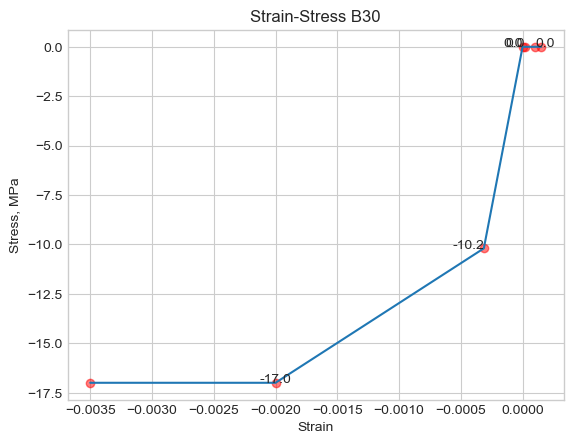

In [17]:
cstrainstress()

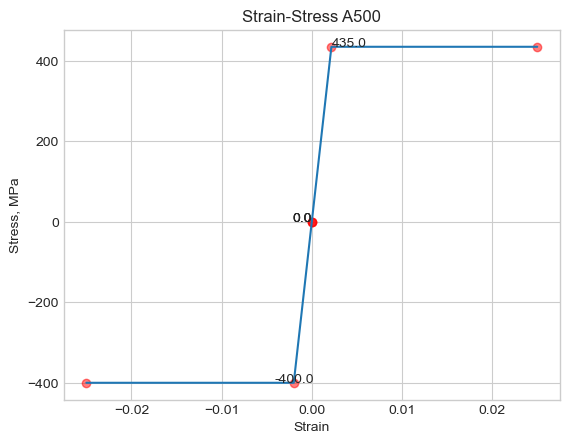

In [18]:
rstrainstress()

In [19]:
def vi(S, E, e):
    if e != 0.0:
        v = S/E/e
    else:
        v = 1.0
    return v

In [20]:
vV = np.vectorize(vi)

In [21]:
def d(A,x,y,E,v):
    E = pr.E
    D = np.array([
        [sum(A*x**2*E*v), sum(A*x*y*E*v),  sum(A*x*E*v)],
        [sum(A*x*y*E*v),  sum(A*y**2*E*v), sum(A*y*E*v)],
        [sum(A*x*E*v),    sum(A*y*E*v),    sum(A*E*v)]
    ])
    return D

In [22]:
def calc(D, Fg):
    try:
        u = np.linalg.solve(D, Fg)
        mes = 'ok'
    except np.linalg.LinAlgError as var1:
        mes = var1
        D = np.eye(6)
        Fi = np.array(([0.0, 0.0, 0.0]))
        u = np.linalg.solve(D, Fi)
    e = Z.dot(u)
    S = vsigma(e, e_2, e_0, e_1, e1, e0, e2, S_1, S1, Rc, Rt, E)
    return u, e, S, mes

In [23]:
def itrn(v, A, x, y):
    acc = 0.0000001
    D = d(A, x, y, E, v)
    u, e, S, mes = calc(D, Fg)
    v = vV(S, E, e)
    i = 0
    du = 0.0001
    resmes = 'Convergence is reached !'
    while du >= acc:
        i = i+1
        if min(e) < -0.0035 or max(e) > 0.025:
            e = np.zeros(n)
            resmes = 'Convergence L/C ' + str(iF) + ' did not reached!!!'
            print(resmes)
            break
        D=d(A,x,y,E,v)
        u_f, e, S, mes = calc(D, Fg)
        v = vV(S, E, e)
        du = np.max(abs(u - u_f))
        u = u_f
    return e, S, u, i, mes, resmes

In [24]:
A=dat['A'].values
x=dat['Zx'].values
y=dat['Zy'].values
n = len(x)
Z = np.transpose(np.array([x, y, np.ones(n)]))
Fg = loads.values[iF]/1000

In [25]:
v = np.ones(n)
e, S, u, i, mes, resmes = itrn(v, A, x, y)

# Результаты

In [26]:
print("Решение   :", mes)
print("Сходимость:", resmes)
print("Итераций  :", i)

Решение   : ok
Сходимость: Convergence is reached !
Итераций  : 44


## Деформации

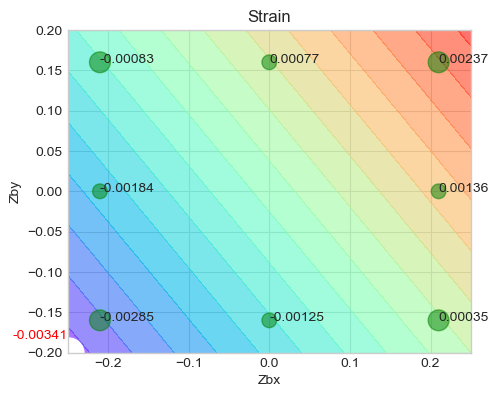

In [27]:
xc = x[pr['T'] == 'concrete']
yc = y[pr['T'] == 'concrete']
zc = e[pr['T'] == 'concrete']
epsmin = min(zc)
x_min = np.array(xc[zc == epsmin][:1])[0]
y_min = np.array(yc[zc == epsmin][:1])[0]
x1 = np.linspace(xc.min(), xc.max(), len(xc))
y1 = np.linspace(yc.min(), yc.max(), len(yc))
x2, y2 = np.meshgrid(x1, y1)
z2 = griddata((xc, yc), zc, (x1[None, :], y1[:, None]), method='linear')
fig, ax = plt.subplots()
ax.set_xlabel('Zbx')
ax.set_ylabel('Zby')
ax.set_aspect('equal')
plt.subplots_adjust(left=0.185, right=0.815, bottom=0.1, top=0.9)
plt.title('Strain')
cont = ax.contourf(x2, y2, z2, 20, alpha=0.6, cmap="rainbow")
xr = x[pr['T'] == 'rebar']
yr = y[pr['T'] == 'rebar']
zr = e[pr['T'] == 'rebar']
As = A[pr['T'] == 'rebar']
ds = np.sqrt(4*As/np.pi)
ax.scatter(xr, yr, s=ds * 8000, c='green', alpha=0.5)
ax.scatter(x_min, y_min, s=500, c='white')
ax.annotate(round(epsmin, 5), (x_min, y_min), size=10, xytext=(
    0, 10), ha='right', color='red', textcoords='offset points')
for i, txt in enumerate(zr):
    ax.annotate(round(txt, 5), (xr[i], yr[i]), size=10, xytext=(
        0, 0), ha='left', textcoords='offset points')
plt.show()

## Напряжения

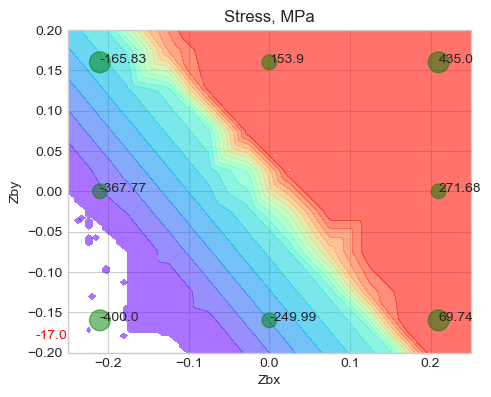

In [28]:
xc = x[pr['T'] == 'concrete']
yc = y[pr['T'] == 'concrete']
zc = S[pr['T'] == 'concrete']
stressmin = min(zc)
x_min = np.array(xc[zc == stressmin][:1])[0]
y_min = np.array(yc[zc == stressmin][:1])[0]
x1 = np.linspace(xc.min(), xc.max(), len(xc))
y1 = np.linspace(yc.min(), yc.max(), len(yc))
x2, y2 = np.meshgrid(x1, y1)
z2 = griddata((xc, yc), zc, (x1[None, :], y1[:, None]), method='linear')
fig, ax = plt.subplots()
ax.set_xlabel('Zbx')
ax.set_ylabel('Zby')
ax.set_aspect('equal')
plt.subplots_adjust(left=0.185, right=0.815, bottom=0.1, top=0.9)
plt.title('Stress, MPa')
cont = ax.contourf(x2, y2, z2, 20, alpha=0.6, cmap="rainbow")
xr = x[pr['T'] == 'rebar']
yr = y[pr['T'] == 'rebar']
zr = S[pr['T'] == 'rebar']
As = A[pr['T'] == 'rebar']
ds = np.sqrt(4*As/np.pi)
ax.scatter(xr, yr, s=ds * 8000, c='green', alpha=0.5)
ax.scatter(x_min, y_min, s=500, c='white')
ax.annotate(round(stressmin, 2), (x_min, y_min), size=10, xytext=(
    0, 10), ha='right', color='red', textcoords='offset points')
for i, txt in enumerate(zr):
    ax.annotate(round(txt, 2), (xr[i], yr[i]), size=10, xytext=(
        0, 0), ha='left', textcoords='offset points')
plt.show()

# Проверка

In [29]:
def converg():
    Ff = np.array((sum(S*x*A), sum(S*y*A), sum(S*A)))
    cvr = np.hstack((1000*Fg.reshape(3, 1), np.round(1000*Ff.reshape(3, 1), 3), u.reshape(3, 1)))
    cvrg = pd.DataFrame(cvr, index=['Mx', 'My', 'N'], columns=['Given', 'Found', 'u'])
    return cvrg

## Сходимость

In [30]:
cvrg = converg()
cvrg.head(np.size(cvrg))

,Given,Found,u
Mx,320.0,319.998,0.007612
My,140.0,139.998,0.006311
N,-1500.0,-1499.992,-0.000240


# Расчет на все нагрузки

In [31]:
nl = len(loads)
ep = np.zeros((nl, 2))
for iF in range(0, nl):
    Fg = loads.values[iF]/1000
    v = np.ones(n)
    e, S, u, i, mes, resmes = itrn(v, A, x, y)
    ep[iF, 0] = round(min(e), 6)
    ep[iF, 1] = round(max(e), 6)

Convergence L/C 4 did not reached!!!
Convergence L/C 7 did not reached!!!


## Деформации

In [32]:
def strains(result):
    fig = plt.figure()
    ax = plt.gca()
    df = result
    df.plot(kind='line', x=None, y='eps_min', color='green', ax=ax)
    df.plot(kind='line', x=None, y='eps_max', color='red', ax=ax)
    plt.title('Strain')
    ax.set_xlabel('L/C')
    ax.set_ylabel('Strain')
    plt.show()

In [33]:
result = pd.DataFrame(ep, columns=['eps_min', 'eps_max'])
result.head(np.size(result))

,eps_min,eps_max
0,0.000000,0.000000
1,-0.000138,0.000144
2,-0.000276,0.000288
3,-0.003405,0.002925
4,0.000000,0.000000
5,-0.001748,0.001269
6,0.002111,0.002111
7,0.000000,0.000000


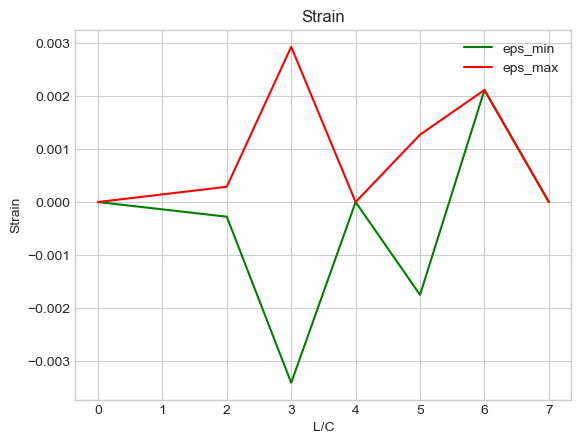

In [34]:
strains(result)